# <img src="./imgs/icon.png" width="36pt"> DocFlow Tutorial
`Updated 08-06-2024`

This python package is used to build documentation automatically.

If there is any error or suggestion identified for this package.  
Please put up an issue to repository: https://git.tulane.edu/jrestool/docflow
or directly Email me: jli78@tulane.edu

This package is still updating. Please check https://git.tulane.edu/jrestool/docflow to get the latest version.

## Setup Environment
`install_guide` is an automatic installation guideline.
It will show the installation steps and check whether they are finished.

In [1]:
from guideline import install_guide
install_guide(True)

### DocFlow Package Install Guideline  
#### ✅STEP 1: CONDA Setup  
(Version: 24.5.0)  
Please following this link to download and install conda: [https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe](https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe)  
#### ✅STEP 2: CONDA Environment Create  
(Env: APL)  
Please create conda environment following: `conda create -n docflow python=3.8` and activate it with `conda activate docflow` (The name can be changed to your prefer one.). If you have already activated it, please directly activate it.  
#### ✅STEP 3: Python Setup  
(Python: 3.10.14)  
Please install python with version greater than `3.6` following instruction: `conda install python=3.8`  
#### ✅STEP 4: Other Python Packages Setup  
Please check the following table and install the requried packages:  
|            | Version   | Installed   | Install Command          |
|:-----------|:----------|:------------|:-------------------------|
| pandas     | 2.2.2     | ✅          | `pip install pandas`     |
| matplotlib | 3.9.1     | ✅          | `pip install matplotlib` |
| markdown   | 3.6       | ✅          | `pip install markdown`   |
| tabulate   | 0.9.0     | ✅          | `pip install tabulate`   |  



## Create Doc
It is a modulized documentation generation package. Any documentation component can be created independently.

Just need to contain all modules you like in `Document()` class.

For example, we create an example documentation with a title and text by modules `Title()` and `Text()` separately.

In [2]:
import docflow
doc = docflow.Document(
    docflow.Title('Hello World', level=3),
    docflow.Text('This is a DocFlow example.'),
    docflow.IdenticalBadge()
)

To visualize the document, you can directly show it in jupyter notebook.

It will automatically detect the environment and show the document in the best way.

In [3]:
# Automatically show rendered documentation in jupyter
doc

### Hello World  
This is a DocFlow example.  
![DocFlow-AutoDoc](https://img.shields.io/badge/DocFlow-AutoDoc-2ea44f)  



In [4]:
# If this environment is a terminal environment,
# It will show plain text
print(repr(doc))

### Hello World  
This is a DocFlow example.  
![DocFlow-AutoDoc](https://img.shields.io/badge/DocFlow-AutoDoc-2ea44f)  




The modules can also be added after `Document()` created

In [5]:
doc.add(docflow.Title('Add More Titles', level=2))
doc

### Hello World  
This is a DocFlow example.  
![DocFlow-AutoDoc](https://img.shields.io/badge/DocFlow-AutoDoc-2ea44f)  

## Add More Titles  


## Add Different Documentation Component

There are different components supported in this package.

It will be shown below.

_Notice: Any document component is also a document, you can directly show/save it as a document._

In [6]:
# Different level titles
# Only 1 - 5 level
docflow.Document(
    docflow.Title('First Level Heading',   level=1),
    docflow.Title('Second Level Heading',  level=2),
    docflow.Title('Third Level Heading',   level=3),
    docflow.Title('Fourth Level Heading',  level=4),
    docflow.Title('Fifth  Level Heading',  level=5),
)

# First Level Heading  
## Second Level Heading  
### Third Level Heading  
#### Fourth Level Heading  
##### Fifth  Level Heading  


In [7]:
# Markdown text
# It can wrap any markdown stuff including formula, tag, bold, ...
docflow.Document(
    docflow.Text('This is a simple text.'),
    docflow.Text(r'This is a formula: $\sqrt{\frac{\sum_{i}^{n} (y_i - \hat{y}_i)^2}{n}}$.'),
    docflow.Text('This is a **BOLD** and a $ITALY$ style word.'),
    docflow.Text('This is a `TAG`'),
)

This is a simple text.  
This is a formula: $\sqrt{\frac{\sum_{i}^{n} (y_i - \hat{y}_i)^2}{n}}$.  
This is a **BOLD** and a $ITALY$ style word.  
This is a `TAG`  


In [8]:
# Embedded a Pandas table
# It can directly accept a DataFrame as input
import pandas as pd
example_table = pd.DataFrame([
    {'ID': 1, 'Item': 'Apple', 'Quantity': 10},
    {'ID': 2, 'Item': 'Fish',  'Quantity': 0},
    {'ID': 3, 'Item': 'Cat',   'Quantity': 5},
])
docflow.Table(example_table)

|    |   ID | Item   |   Quantity |
|---:|-----:|:-------|-----------:|
|  0 |    1 | Apple  |         10 |
|  1 |    2 | Fish   |          0 |
|  2 |    3 | Cat    |          5 |  



In [9]:
# List or dictionary
# Any list or dictionary can be directly show as a list
docflow.Sequence([
    'Hello World',
    152.646,
])

- Hello World  
- 152.646  


In [10]:
docflow.Sequence({
    'String': 'Hello',
    'Value': 152.646,
})

- **String**: Hello  
- **Value**: 152.646  


In [11]:
# It also supports index list
docflow.Sequence({
    'String': 'Hello',
    'Value': 152.646,
}, num_index=True)

0 **String**: Hello  
1 **Value**: 152.646  


In [12]:
# It can also save a Python Function as a code
# Use RMSE as an example function
def RMSE(y_pred, y_true):
    se = (y_pred - y_true)**2
    mse = sum(se) / len(se)
    rmse = mse ** 0.5
    return rmse

# Now demonstrate it in document way
docflow.Code(RMSE, lang='python')

```python
 def RMSE(y_pred, y_true):
    se = (y_pred - y_true)**2
    mse = sum(se) / len(se)
    rmse = mse ** 0.5
    return rmse

```


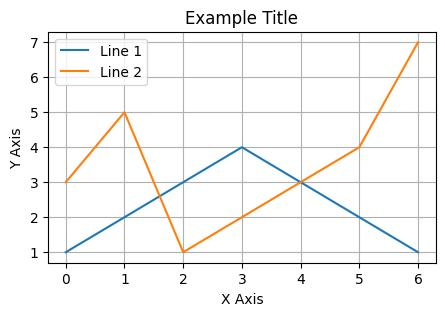   



In [13]:
# We can embed any figure create by matplotlib
# First, create an image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
ax = fig.subplots()
ax.plot([1,2,3,4,3,2,1], label='Line 1')
ax.plot([3,5,1,2,3,4,7], label='Line 2')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.grid()
ax.legend()
ax.set_title('Example Title')

docflow.EmbeddedImage(fig)

In [14]:
# Create a timestamp for the documentation generation
docflow.DateTimeStamp()

`06-08-2024 17:43:12 Central Daylight Time`  


In [15]:
# (HTML version only)
# Create expander
# To make sure the document is not too long to read
# We can put some components in expander and hide them

docflow.Expander(
    docflow.Document(
        docflow.Text('This is an expander example.'),
        docflow.Text('These contents can be folded.\n'),
        docflow.Table(example_table)
    ),
    'An Example Expander'
)

<details >
<summary>An Example Expander</summary>  
<p>This is an expander example.<br />
These contents can be folded.</p>
<table>
<thead>
<tr>
<th style="text-align: right;"></th>
<th style="text-align: right;">ID</th>
<th style="text-align: left;">Item</th>
<th style="text-align: right;">Quantity</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: right;">0</td>
<td style="text-align: right;">1</td>
<td style="text-align: left;">Apple</td>
<td style="text-align: right;">10</td>
</tr>
<tr>
<td style="text-align: right;">1</td>
<td style="text-align: right;">2</td>
<td style="text-align: left;">Fish</td>
<td style="text-align: right;">0</td>
</tr>
<tr>
<td style="text-align: right;">2</td>
<td style="text-align: right;">3</td>
<td style="text-align: left;">Cat</td>
<td style="text-align: right;">5</td>
</tr>
</tbody>
</table>  
</details>  


In [16]:
# Magic method
# Add any content you want
# DocFlow will recognize it automatically
docflow.Document(
    docflow.Magic([1,2,3]),
    docflow.Magic({'a':1, 'b':2, 'c':3}),
    docflow.Magic('Hello World\n'),
    docflow.Magic(example_table)
)

- 1  
- 2  
- 3  
- **a**: 1  
- **b**: 2  
- **c**: 3  
Hello World
  
|    |   ID | Item   |   Quantity |
|---:|-----:|:-------|-----------:|
|  0 |    1 | Apple  |         10 |
|  1 |    2 | Fish   |          0 |
|  2 |    3 | Cat    |          5 |  



## Save Document
The document can be saved as two formats: `HTML` and `Markdown`.

The `HTML` version embedded a github-style markdown render style sheets

In [17]:
# First, create an example document
# Example figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
ax = fig.subplots()
ax.plot([1,2,3,4,3,2,1], label='Line 1')
ax.plot([3,5,1,2,3,4,7], label='Line 2')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.grid()
ax.legend()
ax.set_title('Example Title')
# Example table
import pandas as pd
example_table = pd.DataFrame([
    {'ID': 1, 'Item': 'Apple', 'Quantity': 10},
    {'ID': 2, 'Item': 'Fish',  'Quantity': 0},
    {'ID': 3, 'Item': 'Cat',   'Quantity': 5},
])
# Example function
def RMSE(y_pred, y_true):
    se = (y_pred - y_true)**2
    mse = sum(se) / len(se)
    rmse = mse ** 0.5
    return rmse

doc = docflow.Document(
    docflow.Title('Test Document', level=1),
    docflow.IdenticalBadge(),
    docflow.DateTimeStamp(),
    docflow.Text('This is an example document.'),
    docflow.Title('An Example Table', level=2),
    docflow.Table(example_table),
    docflow.Title('An Example Figure', level=2),
    docflow.EmbeddedImage(fig),
    docflow.Title('An Example Function Code', level=2),
    docflow.Code(RMSE)
)

Create Catalog for This Document

In [18]:
doc._documents.insert(3, docflow.Catalog(doc))

Save documents

In [19]:
# Save it as Markdown
doc.save('./example.md', format='markdown')

In [20]:
# Save it as HTML
doc.save('./example.html', format='html')

# Test Document  
![DocFlow-AutoDoc](https://img.shields.io/badge/DocFlow-AutoDoc-2ea44f)  

`06-08-2024 17:43:12 Central Daylight Time`  
  - [Test Document](#test-document)
    - [An Example Table](#an-example-table)
    - [An Example Figure](#an-example-figure)
    - [An Example Function Code](#an-example-function-code)
This is an example document.  
## An Example Table  
|    |   ID | Item   |   Quantity |
|---:|-----:|:-------|-----------:|
|  0 |    1 | Apple  |         10 |
|  1 |    2 | Fish   |          0 |
|  2 |    3 | Cat    |          5 |  

## An Example Figure  
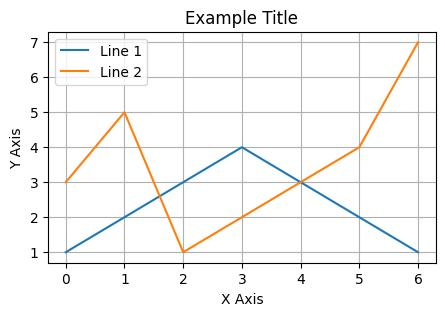   

## An Example Function Code  
```python
 def RMSE(y_pred, y_true):
    se = (y_pred - y_true)**2
    mse = sum(se) / len(se)
    rmse = mse ** 0.5
    return rmse

```


In [21]:
doc